# Learning to use PyVISA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

import visa
nirm = visa.ResourceManager()
print(nirm.list_resources())
#pyrm = visa.ResourceManager('@py')

('ASRL1::INSTR', 'ASRL14::INSTR')


## Device Addresses
Fixed in firewall.

  * Power Supply DP832: 192.168.14.40
  * Oscilloscope DS2072: 192.168.14.41
  * Function Generator DG4062: 192.168.14.42
  * Spectrum Analyzer DSA815: 192.168.14.43

In [2]:
oscp = nirm.open_resource("TCPIP::192.168.14.41::inst0::INSTR")
print(oscp.query('*IDN?'))
fgen = nirm.open_resource("TCPIP::192.168.14.42::inst0::INSTR")
print(fgen.query('*IDN?'))

RIGOL TECHNOLOGIES,DS2202,DS2A151700862,00.03.03.SP1

Rigol Technologies,DG4202,DG4E153900825,00.01.07



In [3]:
fgen.write(':SOURCE1:VOLTAGE:AMPLITUDE 1.0')
fgen.write(':OUTP1:STAT ON')

(16, <StatusCode.success: 0>)

In [13]:
oscp.write(':WAV:RESET')
oscp.write(':WAVEFORM:SOURCE CHANNEL1')
print(oscp.query(':WAVEFORM:SOURCE?'))
oscp.write(':RUN')
oscp.write(':WAV:FORM ASCII')
oscp.write(':WAV:MODE NORMAL')
print(oscp.ask(':WAV:YINC?'))
print(oscp.ask(':WAV:YREF?'))
print(oscp.ask(':WAV:YOR?'))
time.sleep(1)
oscp.write(':WAV:START 1')
oscp.write(':WAV:STOP 1400')
oscp.query(':WAV:DATA?')

CHAN1

2.000000e-02

127

49



'1.740000e+00,1.660000e+00,1.740000e+00,1.660000e+00,1.660000e+00,1.740000e+00,1.720000e+00,1.640000e+00,1.700000e+00,1.640000e+00,1.700000e+00,1.620000e+00,1.620000e+00,1.700000e+00,1.680000e+00,1.600000e+00,1.600000e+00,1.680000e+00,1.660000e+00,1.580000e+00,1.580000e+00,1.660000e+00,1.640000e+00,1.580000e+00,1.640000e+00,1.560000e+00,1.560000e+00,1.640000e+00,1.620000e+00,1.540000e+00,1.540000e+00,1.620000e+00,1.600000e+00,1.540000e+00,1.600000e+00,1.520000e+00,1.600000e+00,1.520000e+00,1.580000e+00,1.500000e+00,1.580000e+00,1.500000e+00,1.580000e+00,1.500000e+00,1.500000e+00,1.580000e+00,1.560000e+00,1.500000e+00,1.560000e+00,1.480000e+00,1.480000e+00,1.560000e+00,1.480000e+00,1.560000e+00,1.540000e+00,1.480000e+00,1.540000e+00,1.460000e+00,1.540000e+00,1.460000e+00,1.540000e+00,1.460000e+00,1.460000e+00,1.540000e+00,1.460000e+00,1.540000e+00,1.460000e+00,1.540000e+00,1.520000e+00,1.460000e+00,1.520000e+00,1.460000e+00,1.440000e+00,1.520000e+00,1.520000e+00,1.440000e+00,1.520000e+0

([<matplotlib.lines.Line2D at 0x2676b313f28>], (1400,))

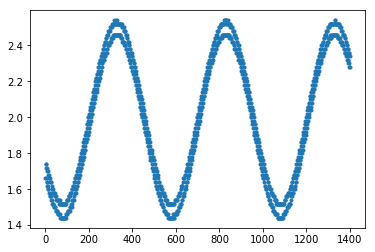

In [14]:
data = np.array(oscp.ask(':WAV:DATA?').split(',')).astype(float)
plt.plot(data,'.'),data.shape

In [12]:
data

array([ 1.76,  1.66,  1.76, ...,  2.28,  2.28,  2.36])

In [5]:
oscp.write(':WAV:START')
data = oscp.query(':WAV:DATA?')
data = np.array(data.split(',')).astype(float)

In [6]:
data

array([ 1.36,  1.36,  1.36, ...,  3.4 ,  3.8 ,  3.96])

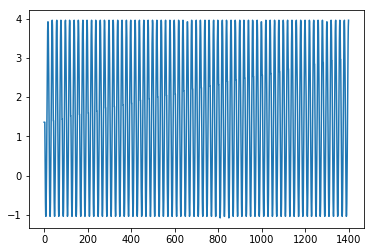

In [7]:
plt.plot(data)

In [63]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [52]:
data.shape

(1400,)

In [13]:
oscp.query('ACQ:TYPE?')

'HRES\n'

In [14]:
oscp.query('ACQ:MDEP?')

'5600000\n'

In [25]:
oscp.write(':RUN')

(6, <StatusCode.success: 0>)

In [9]:
oscp.write(':TIM:MAIN:SCALE 0.0002')
oscp.query(':TIM:MAIN:SCALE?')

'5.000000e-03\n'

In [41]:
oscp.query(':MEAS:FREQ?')

'9.999999e+02\n'

In [42]:
oscp.query(':MEAS:VAMP?')

'1.000000e+00\n'

In [46]:
oscp.query(':WAV:PRE?')

'2,0,1400,1,5.000000e-05,-3.465000e-02,0,8.000000e-03,0,127\n'

In [47]:
oscp.query(':WAV:STAT?')

'IDLE,0\n'

In [56]:
disp = oscp.query_binary_values(':DISP:DATA?')

In [57]:
len(disp)

288013

In [58]:
800*480

384000